# Model evaluation

In [1]:
import pickle
file = open('X_test', 'rb')

# dump information to that file
X_test = pickle.load(file)

# close the file
file.close()

In [2]:
import pickle
file = open('y_test', 'rb')

# dump information to that file
y_test = pickle.load(file)

# close the file
file.close()

In [3]:
import os
import numpy as np
import pandas as pd
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
from PIL import Image
import PIL
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

## Color change

In [4]:
X_test=np.stack([X_test]*3, axis=-1)

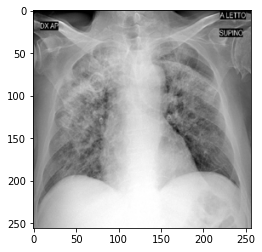

In [5]:
plt.imshow(X_test[2])

## Evaluate Model

In [6]:
from tensorflow.keras import models
loaded_model = models.load_model('/Users/davidmedioni/code/dino120798/finalproject/models')

In [7]:
loaded_model

In [8]:
loaded_model.evaluate(X_test, y_test, verbose=1)

37/37 [==============================] - 436s 12s/step - loss: 6.0744 - accuracy: 0.0771


[6.074391841888428, 0.0771208256483078]

## Scores

In [9]:
y_true = y_test

In [11]:
y_pred = loaded_model.predict(y_true)

ValueError: in user code:

    /Users/davidmedioni/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /Users/davidmedioni/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/davidmedioni/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/davidmedioni/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/davidmedioni/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/davidmedioni/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /Users/davidmedioni/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /Users/davidmedioni/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/davidmedioni/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:271 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer sequential_1: expected shape=(None, 256, 256, 3), found shape=(None, 4)


In [ ]:
number_list = y_pred

(unique, counts) = np.unique(number_list, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

In [ ]:
number_list = y_true

(unique, counts) = np.unique(number_list, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
cm = confusion_matrix(y_true,y_pred)

In [ ]:
labels = [‘bacterial_pneumonia’, ‘covid-19’, ‘normal’, ‘viral_pneumonia’]

In [ ]:
df_cm = pd.DataFrame(cm, index = [i for i in labels],
                  columns = [i for i in labels])

In [ ]:
sns.heatmap(df_cm, annot=True)

In [ ]:
target_names =['bacterial_pneumonia', 'covid-19', 'normal', 'viral_pneumonia']
print(classification_report(y_true, y_pred, target_names=target_names))